# Vector Calculus
### Taylor series
A representation of a function $f$ as an infinite sum of terms. These terms are determined using derivatives of $f$ evaluated at $x_0$

### Definition 5.3 Taylor Polynomial 
The TP of degree $n$ of $f:\mathbb{R}\rightarrow \mathbb{R}$ at $x_0$ is
$$T_n(x):=\sum_{k=0}^n\frac{f^kx_0}{k!}(x-x_0)^k$$
where $f^k(x_0)$ is the $k$ th derivative of $f$ at $x_0$ (which we assume exists) and the fraction are the coefficients of the polynomial.
### Definition 5.4 Taylor Series
For a smooth function $f\in C^{\infty}$, $f:\mathbb{R}\rightarrow \mathbb{R}$, the Taylor series of $f$ at $x_0$ is defined as  $$T_{\infty}(x)=\sum_{k=0}^{\infty}\frac{f^kx_0}{k!}(x-x_0)^k$$
For $x_0=0$, we obtain the __Maclauring series__ as a special instance of the Taylor series. If $f(x)=T_{\infty}(x)$ then $f$ is called _analytic_. 

In general a Taylor Polynomial of degree $n$ is an approximation of a function which does not need to be a polynomial. The Taylor polynomial

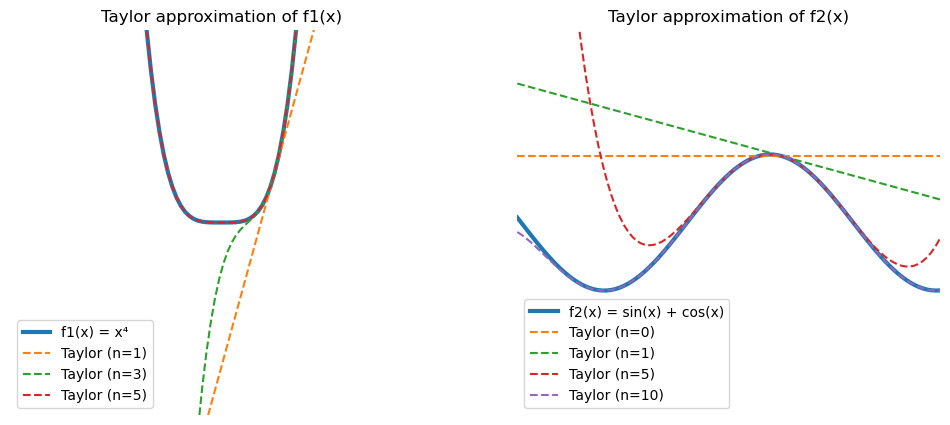

In [76]:
import torch
import matplotlib.pyplot as plt

def taylor_series(f, x, a, n):
    x_pt = torch.tensor(a, requires_grad=True)  # point where we compute derivatives
    derivatives = []
    y = f(x_pt)
    derivatives.append(y.detach())  # f(a)
    
    for k in range(1, n + 1):
        grad = torch.autograd.grad(y, x_pt, create_graph=True)[0]
        derivatives.append(grad.detach())
        y = grad  # prepare for next differentiation
    
    taylor = torch.zeros_like(x)
    for k in range(n + 1):
        term = (derivatives[k] / torch.tensor(factorial(k))) * (x - a)**k
        taylor += term
    
    return taylor

def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

def f1(x):
    return x**4

def f2(x):
    return torch.sin(x) + torch.cos(x)

x = torch.linspace(-4, 4, 100)
a = 1.0


plt.rcParams['figure.figsize'] = (12, 5)


plt.subplot(1, 2, 1)
plt.plot(x, f1(x), label='f1(x) = x⁴', linewidth=3)
for k in [1, 3, 5]:
    taylor_f1_ordern = taylor_series(f1, x, a, k)
    plt.plot(x, taylor_f1_ordern, '--', label=f'Taylor (n={k})')
plt.xlim(-4, 4) ; plt.ylim(-4,4)
plt.axis(False) ;plt.grid()
plt.legend()
plt.title('Taylor approximation of f1(x)')

plt.subplot(1, 2, 2)
plt.plot(x, f2(x), label='f2(x) = sin(x) + cos(x)', linewidth=3)
for k in [0, 1, 5, 10]:
    taylor_f2_ordern = taylor_series(f2, x, a, k)
    plt.plot(x, taylor_f2_ordern, '--', label=f'Taylor (n={k})')
plt.xlim(-4, 4) ; plt.ylim(-4,4)
plt.axis(False)
plt.legend()
plt.title('Taylor approximation of f2(x)')
plt.show()

## Differentiation Rules
Product rule, quotient rule, sum rule, chain rule, we have to remember them, the chain rule is different from the product rule, product rule is from the form $(f(x)g(x))'$ and the chain rule $(g(f(x)))'$

### Linearization and Multivariate Taylor Series
The gradient of a function is often used for a locally approximation of $f$ around $x_0$ $$f(x)\approx f(x_0)+\nabla_xf (x_0)(x-x_0)$$
Here $\nabla_x f$ is the gradient of $f$ with respect to $x$ evaluated at $x_0$.

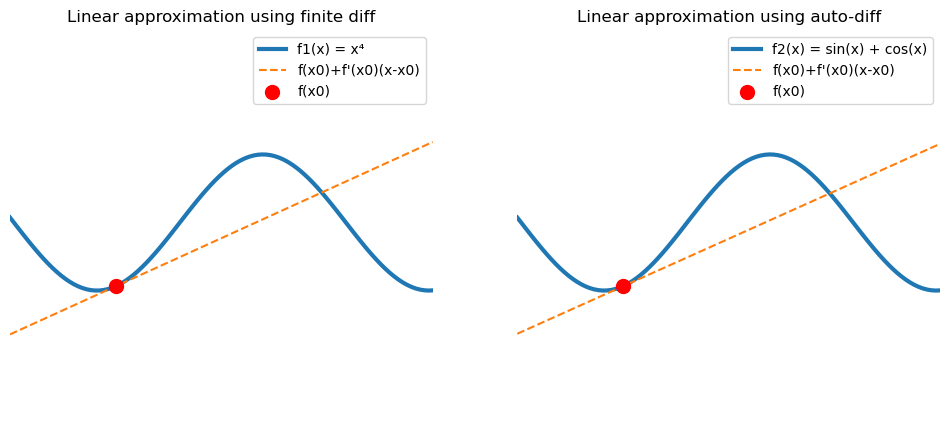

In [93]:
def grad(f, h=0.01): # known as the forward difference
    def derivative(x):
        return (f(x + h) - f(x)) / h
    return derivative

def linear_approximation(f, x, x0): 
    x0 = torch.tensor(x0)
    fx0 = f(x0)
    nabla = grad(f)
    return fx0 + nabla(x0)*(x-x0)


def linear_approximation_torch(f,x, x0):
    x0 = torch.tensor(x0, requires_grad=True)
    fx0 = f(x0)
    fx0.backward() # df/dx at x0
    grad_fx0 = x0.grad
    x0 = x0.detach() # from computation graph
    return fx0.detach() + grad_fx0 * (x-x0)

x0_point = torch.tensor(-2.0)
y0_point = f2(x0_point)

plt.subplot(1, 2, 1)
plt.plot(x, f2(x), label='f1(x) = x⁴', linewidth=3)
linear_approx = linear_approximation(f2, x, -2.0)
plt.plot(x, linear_approx, '--', label=f"f(x0)+f'(x0)(x-x0)")
plt.scatter(x0_point, y0_point, color='red', s=100, zorder=5,
             label=f'f(x0)')
plt.xlim(-4, 4) ; plt.ylim(-4,4)
plt.axis(False) ;plt.grid()
plt.legend()
plt.title('Linear approximation using finite diff')

plt.subplot(1, 2, 2)
plt.plot(x, f2(x), label='f2(x) = sin(x) + cos(x)', linewidth=3)
lin_approx_torch = linear_approximation_torch(f2, x, -2.0)
plt.plot(x, lin_approx_torch, '--', label=f"f(x0)+f'(x0)(x-x0)")
plt.scatter(x0_point, y0_point, color='red', s=100, zorder=5,
             label=f'f(x0)')
plt.xlim(-4, 4) ; plt.ylim(-4,4)
plt.axis(False)
plt.legend()
plt.title('Linear approximation using auto-diff')
plt.show()